In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import LabelEncoder

In [2]:
train=pd.read_csv(r"C:\Users\Rahul\Downloads\Data\ML1\dataset\train.csv", parse_dates=["instock_date"])
test=pd.read_csv(r"C:\Users\Rahul\Downloads\Data\ML1\dataset\test.csv", parse_dates=["instock_date"])
train.shape, test.shape

((6368, 15), (3430, 14))

In [3]:
train.head(10)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
5,SHIECAYW3VZWGZGX,23.0,2015-09-25 16:31:46,162,Brilee,No,Technology,1,49,0.0,633.0,6.0,3959.0,6104.0,5631.247872
6,SHOE4FZGGTE7HJXN,33.0,2014-12-08 12:25:52,462,Zoe,No,Cosmetics,3,57,0.0,263.0,13.0,2006.0,5257.0,3874.264992
7,SHOE6QGAYFFMBWG6,4.0,2015-09-22 14:29:06,23,Koby,Yes,Educational,1,67,0.0,104.0,15.0,3596.0,5921.0,4820.943600
8,KRTEBSMKCGFESHYX,26.0,2016-03-28 21:48:01,156,Tiffani,Yes,Child_care,0,53,0.0,310.0,6.0,6965.0,10194.0,8837.724240
9,BRAE3P8Y8UVRY43K,5.0,2015-08-19 22:16:52,275,Nigel,Yes,Child_care,0,84,1.0,321.0,8.0,1103.0,5430.0,530.761862


In [4]:
train.info(), train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product_id        6368 non-null   object        
 1   Stall_no          6363 non-null   float64       
 2   instock_date      6368 non-null   datetime64[ns]
 3   Market_Category   6368 non-null   int64         
 4   Customer_name     6157 non-null   object        
 5   Loyalty_customer  6368 non-null   object        
 6   Product_Category  6368 non-null   object        
 7   Grade             6368 non-null   int64         
 8   Demand            6368 non-null   int64         
 9   Discount_avail    6330 non-null   float64       
 10  charges_1         6170 non-null   float64       
 11  charges_2 (%)     6163 non-null   float64       
 12  Minimum_price     6330 non-null   float64       
 13  Maximum_price     6025 non-null   float64       
 14  Selling_Price     6327 n

(None,
 Product_id            0
 Stall_no              5
 instock_date          0
 Market_Category       0
 Customer_name       211
 Loyalty_customer      0
 Product_Category      0
 Grade                 0
 Demand                0
 Discount_avail       38
 charges_1           198
 charges_2 (%)       205
 Minimum_price        38
 Maximum_price       343
 Selling_Price        41
 dtype: int64)

In [5]:
test.isnull().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
dtype: int64

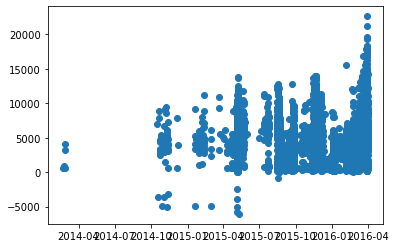

In [6]:
plt.scatter(train["instock_date"], train["Selling_Price"])

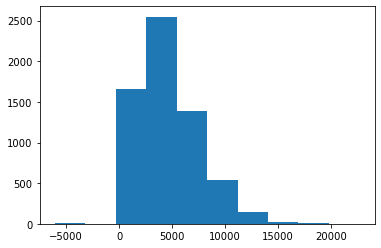

In [7]:
plt.hist(train["Selling_Price"]);

In [260]:
train=train[train["Selling_Price"]>0]

In [253]:
train["Selling_Price"]=np.where((train["Discount_avail"]==0) & (train["Selling_Price"]<train["Minimum_price"]),train["Minimum_price"],train["Selling_Price"])

In [49]:
train["Selling_Price"]=np.where(train["Selling_Price"]>train["Maximum_price"],train["Maximum_price"],train["Selling_Price"])

In [261]:
train["Stall_no"].fillna(20,inplace=True)
test["Stall_no"].fillna(20, inplace=True)

In [262]:
train.drop(["Product_id","Customer_name"], axis=1, inplace=True)
test.drop(["Product_id","Customer_name"], axis=1, inplace=True)

In [263]:
train.Discount_avail.value_counts()

0.0    5396
1.0     880
Name: Discount_avail, dtype: int64

In [264]:
train["Discount_avail"].fillna(0, inplace=True)
test["Discount_avail"].fillna(0, inplace=True)

In [265]:
mean_charge1=pd.pivot_table(index="Grade", values="charges_1", data=train,aggfunc="mean")

In [266]:
train.loc[train["charges_1"].isnull(),"charges_1"]=train.loc[train["charges_1"].isnull(),"Grade"].apply(lambda x: mean_charge1.loc[x])
test.loc[test["charges_1"].isnull(),"charges_1"]=test.loc[test["charges_1"].isnull(),"Grade"].apply(lambda x: mean_charge1.loc[x])
train["charges_1"]=train["charges_1"].astype("float")
test["charges_1"]=test["charges_1"].astype("float")

In [267]:
mean_charge2=pd.pivot_table(index="Grade", values="charges_2 (%)", data=train,aggfunc="mean")

In [268]:
train.loc[train["charges_2 (%)"].isnull(),"charges_2 (%)"]=train.loc[train["charges_2 (%)"].isnull(),"Grade"].apply(lambda x: mean_charge2.loc[x])
test.loc[test["charges_2 (%)"].isnull(),"charges_2 (%)"]=test.loc[test["charges_2 (%)"].isnull(),"Grade"].apply(lambda x: mean_charge2.loc[x])
test["charges_2 (%)"]=test["charges_2 (%)"].astype("float")

In [269]:
mean_min=pd.pivot_table(index="Grade", values="Minimum_price", data=train,aggfunc="mean")

In [270]:
train.loc[train["Minimum_price"].isnull(),"Minimum_price"]=train.loc[train["Minimum_price"].isnull(),"Grade"].apply(lambda x: mean_min.loc[x])
test.loc[test["Minimum_price"].isnull(),"Minimum_price"]=test.loc[test["Minimum_price"].isnull(),"Grade"].apply(lambda x: mean_min.loc[x])
test["Minimum_price"]=test["Minimum_price"].astype("float")

In [271]:
mean_max=pd.pivot_table(index="Grade", values="Maximum_price", data=train,aggfunc="mean")

In [272]:
train.loc[train["Maximum_price"].isnull(),"Maximum_price"]=train.loc[train["Maximum_price"].isnull(),"Grade"].apply(lambda x: mean_max.loc[x])

In [273]:
mean_sell=pd.pivot_table(index="Grade", values="Selling_Price", data=train,aggfunc="mean")

In [274]:
train.loc[train["Selling_Price"].isnull(),"Selling_Price"]=train.loc[train["Selling_Price"].isnull(),"Grade"].apply(lambda x: mean_sell.loc[x])

In [275]:
train["day"]=train["instock_date"].dt.day
train["month"]=train["instock_date"].dt.month
train["hour"]=train["instock_date"].dt.hour
train["dayofweek"]=train["instock_date"].dt.dayofweek
test["day"]=test["instock_date"].dt.day
test["month"]=test["instock_date"].dt.month
test["hour"]=test["instock_date"].dt.hour
test["dayofweek"]=test["instock_date"].dt.dayofweek
train.drop("instock_date", axis=1, inplace=True)
test.drop("instock_date", axis=1, inplace=True)
train.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,day,month,hour,dayofweek
0,37.0,2,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,22,8,18,5
1,38.0,24,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,27,3,21,6
2,9.0,447,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,18,8,19,1
3,50.0,23,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,28,3,21,0
4,7.0,63,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,29,3,22,1


In [276]:
train["Selling_Price"]=train["Selling_Price"].astype("float")

In [277]:
m_train=train[["Market_Category","Selling_Price"]].groupby("Market_Category").agg(["mean","count"])
m_train.columns=["m_mean","m_count"]
m_train.head()

,m_mean,m_count
Market_Category,,
0,4896.152507,34
1,3250.473849,41
2,5622.707932,28
3,2874.338211,239
6,5157.042294,3


In [278]:
train=pd.merge(train,m_train, on=["Market_Category"], how="left")
test=pd.merge(test,m_train, on=["Market_Category"], how="left")

In [279]:
s_train=train[["Product_Category","Selling_Price"]].groupby("Product_Category").agg(["mean","count"])
s_train.columns=["mean","count"]
s_train

,mean,count
Product_Category,,
Child_care,4629.952244,652
Cosmetics,4522.018399,643
Educational,4292.141616,605
Fashion,4865.215485,604
Home_decor,4564.958422,610
Hospitality,4498.088248,626
Organic,4337.370474,618
Pet_care,4631.992958,674
Repair,4622.356120,665


In [280]:
train=pd.merge(train,s_train, on=["Product_Category"], how="left")
test=pd.merge(test,s_train, on=["Product_Category"], how="left")

In [281]:
g_train=train[["Grade","Selling_Price"]].groupby("Grade").agg(["mean","count"])
g_train.columns=["g_mean","g_count"]
g_train.head()

,g_mean,g_count
Grade,,
0,4422.445025,4339
1,5759.772743,379
2,4171.635356,1093
3,5964.927400,502


In [282]:
train=pd.merge(train,g_train, on=["Grade"], how="left")
test=pd.merge(test,g_train, on=["Grade"], how="left")

In [283]:
de_train=train[["Demand","Selling_Price"]].groupby("Demand").agg(["mean","count"])
de_train.columns=["de_mean","de_count"]
de_train.head()

,de_mean,de_count
Demand,,
1,4500.852246,73
2,4933.538177,55
3,4644.687051,68
4,4418.539049,66
5,4642.443644,61


In [284]:
train=pd.merge(train,de_train, on=["Demand"], how="left")
test=pd.merge(test,de_train, on=["Demand"], how="left")

In [285]:
h_train=train[["hour","Selling_Price"]].groupby("hour").agg(["mean","count"])
h_train.columns=["h_mean","h_count"]
h_train.head()

,h_mean,h_count
hour,,
0,4622.640620,234
1,4269.110722,171
2,4426.331887,153
3,5110.595719,211
4,5134.744183,243


In [286]:
train=pd.merge(train,h_train, on=["hour"], how="left")
test=pd.merge(test,h_train, on=["hour"], how="left")

In [287]:
d_train=train[["Stall_no","Selling_Price"]].groupby("Stall_no").agg(["mean","count"])
d_train.columns=["s_mean","s_count"]
d_train.head()

,s_mean,s_count
Stall_no,,
1.0,4556.379258,127
2.0,4146.110183,151
3.0,4948.438739,128
4.0,4256.108982,119
5.0,4455.699711,128


In [288]:
train=pd.merge(train,d_train, on=["Stall_no"], how="left")
test=pd.merge(test,d_train, on=["Stall_no"], how="left")

In [289]:
train.drop(["Product_Category","Stall_no","Demand","Grade"],axis=1, inplace=True)
test.drop(["Product_Category","Stall_no","Demand","Grade"],axis=1, inplace=True)

In [290]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [292]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3430 entries, 0 to 3429
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Market_Category       3430 non-null   int64  
 1   Discount_avail        3430 non-null   int64  
 2   charges_1             3430 non-null   float64
 3   charges_2 (%)         3430 non-null   float64
 4   Minimum_price         3430 non-null   float64
 5   Maximum_price         3430 non-null   int64  
 6   day                   3430 non-null   int64  
 7   month                 3430 non-null   int64  
 8   hour                  3430 non-null   int64  
 9   dayofweek             3430 non-null   int64  
 10  m_mean                3396 non-null   float64
 11  m_count               3396 non-null   float64
 12  mean                  3430 non-null   float64
 13  count                 3430 non-null   int64  
 14  g_mean                3430 non-null   float64
 15  g_count              

In [293]:
test["m_mean"].fillna(np.mean(train["m_mean"]), inplace=True)
test["m_count"].fillna(np.mean(train["m_count"]), inplace=True)

#test["m_count"].fillna(np.mean(train["m_count"]), inplace=True)

#test["m_count"].fillna(np.mean(train["m_count"]), inplace=True)

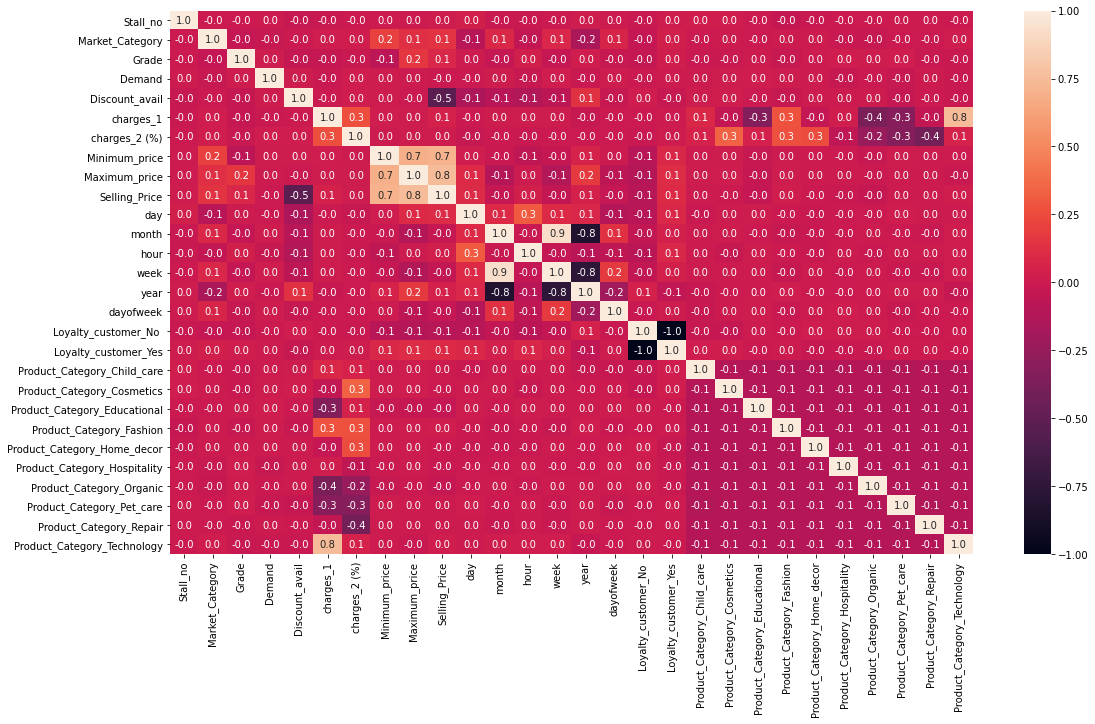

In [26]:
plt.figure(figsize=(18,10))
sns.heatmap(train.corr(), annot=True, fmt="0.1f");

In [294]:
x=train.drop("Selling_Price", axis=1)
y=train["Selling_Price"]

In [295]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6313 entries, 0 to 6312
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Market_Category       6313 non-null   int64  
 1   Discount_avail        6313 non-null   float64
 2   charges_1             6313 non-null   float64
 3   charges_2 (%)         6313 non-null   float64
 4   Minimum_price         6313 non-null   float64
 5   Maximum_price         6313 non-null   float64
 6   day                   6313 non-null   int64  
 7   month                 6313 non-null   int64  
 8   hour                  6313 non-null   int64  
 9   dayofweek             6313 non-null   int64  
 10  m_mean                6313 non-null   float64
 11  m_count               6313 non-null   int64  
 12  mean                  6313 non-null   float64
 13  count                 6313 non-null   int64  
 14  g_mean                6313 non-null   float64
 15  g_count              

In [296]:
lgb=LGBMRegressor()
score=cross_val_score(lgb, x,y, cv=5, scoring="neg_mean_squared_error")
np.sqrt(-np.mean(score))

326.9495578190643

In [297]:
xgb=XGBRegressor()
score=cross_val_score(xgb, x,y, cv=5, scoring="neg_mean_squared_error")
np.sqrt(-np.mean(score))

320.0621223325794

In [298]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
rf=RandomForestRegressor()
et=ExtraTreesRegressor()
score=cross_val_score(et, x,y, cv=5, scoring="neg_mean_squared_error")
np.sqrt(-np.mean(score))

284.87272592641176

In [708]:
xgb.fit(x,y)
pred=xgb.predict(test)

In [299]:
et.fit(x,y)
et.score(x,y)

1.0

In [300]:
#rf=RandomForestRegressor(max_depth=11, n_estimators=200,min_samples_split=10, min_samples_leaf=5 )
et.fit(x,y)
pred=et.predict(test)

In [230]:
#lgb=LGBMRegressor(max_depth=12,n_estimators=869, learning_rate=0.016520094866276484, min_child_weight=9)
lgb.fit(x,y)
pred=lgb.predict(test)

In [301]:
pred=np.where(pred<0,np.mean(pred),pred)

In [302]:
test_df=pd.read_csv(r"C:\Users\Rahul\Downloads\Data\ML1\dataset\test.csv", parse_dates=["instock_date"])

In [303]:
a=zip(test_df["Product_id"],pred)
pred=pd.DataFrame(a, columns=["Product_id","Selling_Price"])
pred.to_csv("submission.csv", index=False)
pred.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3259.127676
1,ACCEGCATKHNRXUHW,1950.503585
2,NKCE6GJ5XVJDXNNZ,11789.470703
3,NKCEB8BK3ZXDHDHM,9373.614768
4,TOPEFDXSAHRNPF94,5690.431367
